In [57]:
from math import sqrt,floor, log2
from Crypto.Util import number
from RSA import *
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import sys, threading
import random
import math
import time

sys.setrecursionlimit(10**7)
threading.stack_size(2**27)

134217728

In [58]:
def Auto_key_generation(n_length = 16):
    p = number.getPrime(n_length // 2)
    q = number.getPrime(n_length // 2)

    while p == q:
        q = number.getPrime(n_length // 2)

    n = p * q
    phi_n = (p - 1) * (q - 1)

    e = number.getPrime(int(log2(phi_n)))
    while GCD(phi_n, e) != 1:
        e = number.getPrime(int(log2(phi_n)))


    return e, n

# Requirement 3: 
Plot a graph of RSA encryption time vs. Key length.

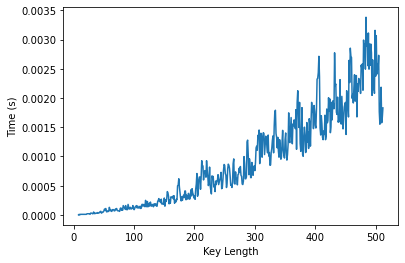

In [59]:
message = "Z"

start = 8
end = 512
x = np.linspace(start, end, end - start + 1)

keys = []

for key_length in x:
    e, n = Auto_key_generation(int(key_length))
    keys.append((e, n))

y = []

for i, j in enumerate(x):
    elapsed_time = 0
    (e, n) = keys[i]
    for _ in range(100):
        start_time = time.time()
        Encrypt(message, n, e)
        end_time = time.time()
        elapsed_time += end_time - start_time
    y.append(elapsed_time / 100)

plt.plot(x, y)
plt.xlabel("Key Length")
plt.ylabel("Time (s)")
plt.show()

# Requirement 4:
Plot a graph of Time to break the private key (in seconds) vs. the value of n.

In [60]:
def bruteForce(n):
    for i in range(2, int(sqrt(n))):
        if n % i == 0:
            p = i
            q = n // i
            break

    return p, q

_, n = Auto_key_generation(32)
print(n)
p, q = bruteForce(n)
if p * q == n:
    print("p =", p)
    print("q =", q)
else:
    print("Couldn't find p and q")

2176242973
p = 40883
q = 53231


In [ ]:
#loop to generate keys
keys_to_break=[]

lower_range=8
upper_range=50
for i in range(lower_range,upper_range):
    (e,n),(d,n)=RSA(int(i))
    keys_to_break.append((e,n))

counter=0
time_array=[]
for i in range(lower_range,upper_range):
    time_taken=0
    #for k in range(1,2):
    st=time.time()
    p,q=break_RSA(keys_to_break[counter])
    et=time.time()
    time_taken=(et-st)
    time_array.append(time_taken)
    print(i,time_taken)
        
    counter+=1

In [ ]:
x_break=np.linspace(lower_range,upper_range,upper_range-lower_range)
print(x_break.shape)
print(np.array(time_array).shape)

plt.plot(x_break,time_array)
plt.show()